In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys  

sys.path.insert(0, '../models')
from singlelocusmodelextended import SingleLocusModelExt
modelext = SingleLocusModelExt(k=1)

panel_label_kw = dict(size=22)#, weight='bold')
star_kw = dict(marker='*', c='w', s=60)
blue,yellow,green,red,pink,brown,pink2,grey,yellow2,blue2 = sns.color_palette("colorblind", 10)
sns.color_palette("colorblind", 10)

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [2]:
post_sam = np.load('../../results/posterior_predictions/posterior_samples.npz', allow_pickle=True)['arr_0']
F_A = np.load('../../results/posterior_predictions/F_A-data.npz', allow_pickle=True)['arr_0']

In [59]:
mean_FA = np.mean(F_A)
perc_FA = np.percentile(F_A,(2.5, 97.5))
mean_FA, perc_FA

(0.16729464236904282, array([0.01540451, 0.36984928]))

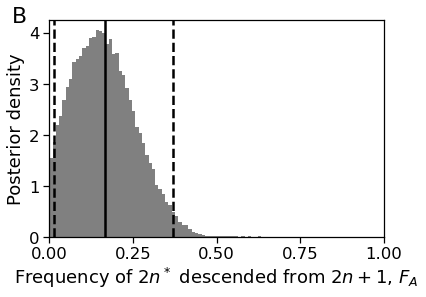

In [60]:
fig, ax = plt.subplots()
ax.hist(F_A, 100, density=True,color='grey')
ax.axvline(x=mean_FA,color='k')
ax.axvline(x=perc_FA[0],color='k',ls='--')
ax.axvline(x=perc_FA[1],color='k',ls='--')
ax.set_xlim([0,1])
panel_label = ax.text(-.11, 4.2, 'B',  **panel_label_kw)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
xlabel = ax.set_xlabel(r'Frequency of $2n^*$ descended from $2n+1$, $F_A$')
ax.set_ylabel('Posterior density')

bbox = dict(bbox_inches='tight', bbox_extra_artists=[xlabel, panel_label])
fig.savefig('../../figures/F_A_posterior.pdf', **bbox);

In [6]:
aneu_dom = F_A>.5
sum(aneu_dom), sum(aneu_dom)/len(F_A), len(F_A) #absolute number of cases where F_A is greater than 0.5, its fraction of the whole

(489, 0.00489, 100000)

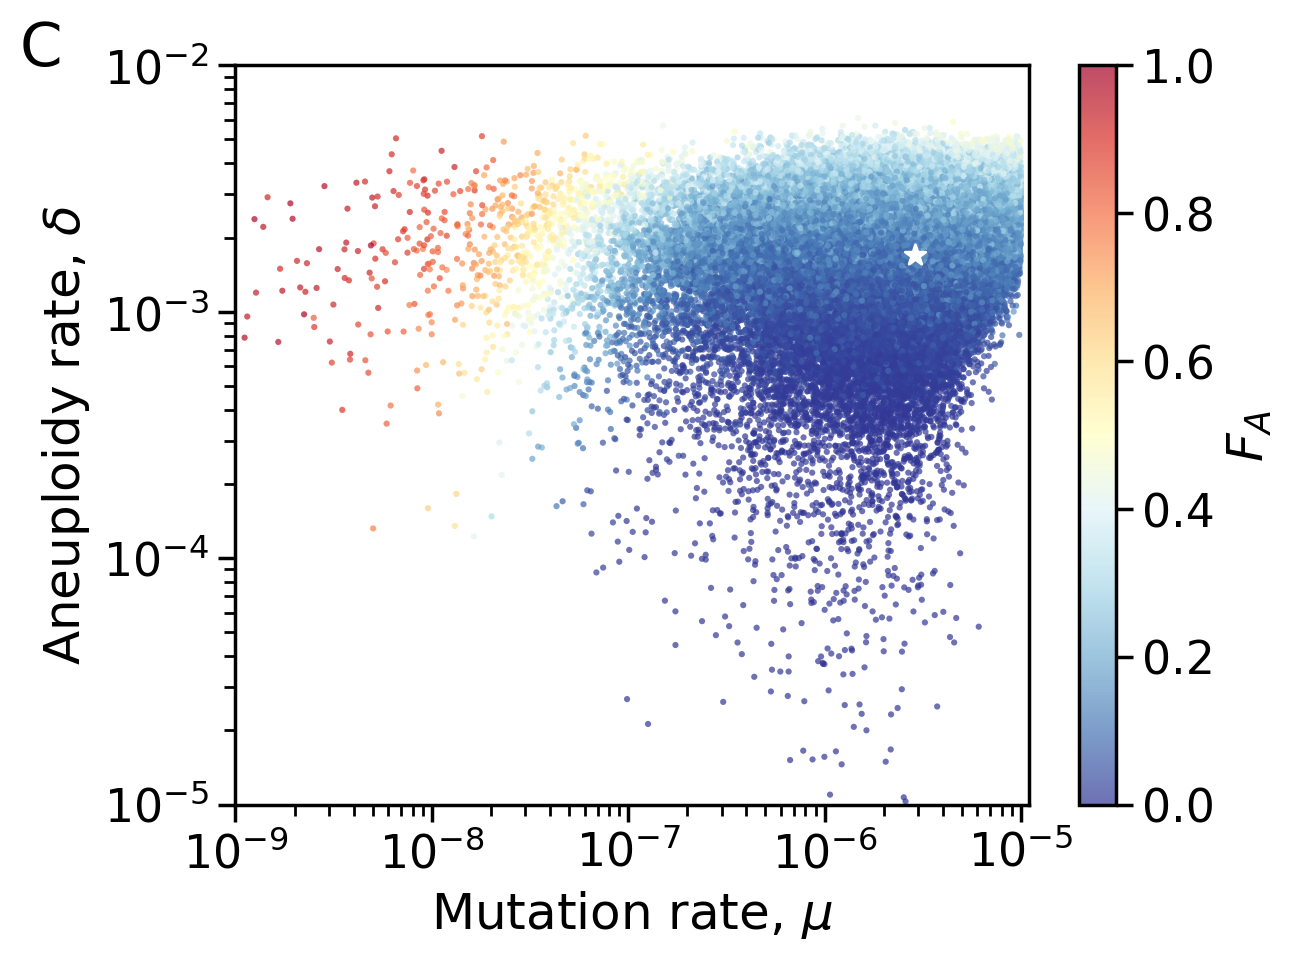

In [20]:
fig, ax = plt.subplots()

im = ax.scatter(post_sam[:,1],post_sam[:,2], c=F_A, cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.7, s=5, rasterized=True)
plt.colorbar(im, ax=ax, label='$F_A$')
ax.scatter(2.9e-6,1.7e-3, **star_kw)
ax.set_xscale('log')
ax.set_yscale('log')
xlabel = ax.set_xlabel('Mutation rate, $\mu$')
ax.set_ylabel('Aneuploidy rate, $\delta$')
ax.set_xlim([1e-9,1.1e-5])
ax.set_ylim([1e-5,1e-2])
panel_label = ax.text(8e-11, .01, 'C', **panel_label_kw)

bbox = dict(bbox_inches='tight', bbox_extra_artists=[xlabel, panel_label])
fig.savefig('../../figures/F_A_mu_delta.pdf', **bbox);

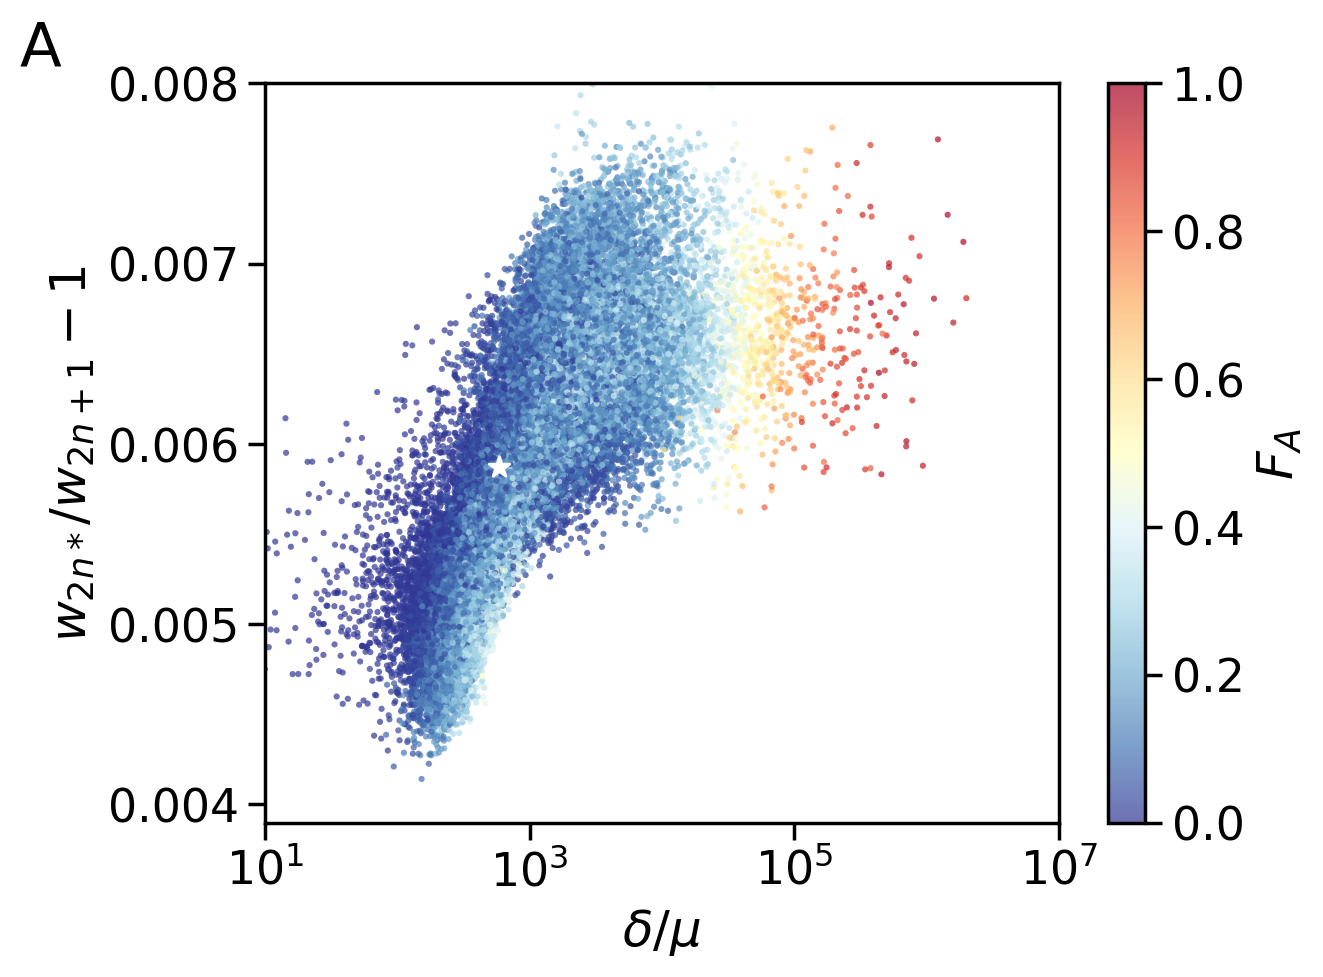

In [28]:
fig, ax = plt.subplots()

im = ax.scatter(post_sam[:,2]/post_sam[:,1],post_sam[:,5]/post_sam[:,3]-1, c=F_A, 
                cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.7, s=5, rasterized=True)
plt.colorbar(im, ax=ax, label='$F_A$')
ax.scatter(1.7e-3/2.9e-6,1.028/1.022-1, **star_kw)
ax.set_xscale('log')
xlabel = ax.set_xlabel('$\delta/\mu$')
ax.set_ylabel('$w_{2n*}/w_{2n+1}-1$')
ax.set_xlim([10,1e7])
ax.set_ylim([.0039,.008])
panel_label = panel_label = ax.text(0.14, 0.0081, 'A', **panel_label_kw)

bbox = dict(bbox_inches='tight', bbox_extra_artists=[xlabel, panel_label])
fig.savefig('../../figures/F_A_delta-mu-ratio_1.pdf', **bbox)

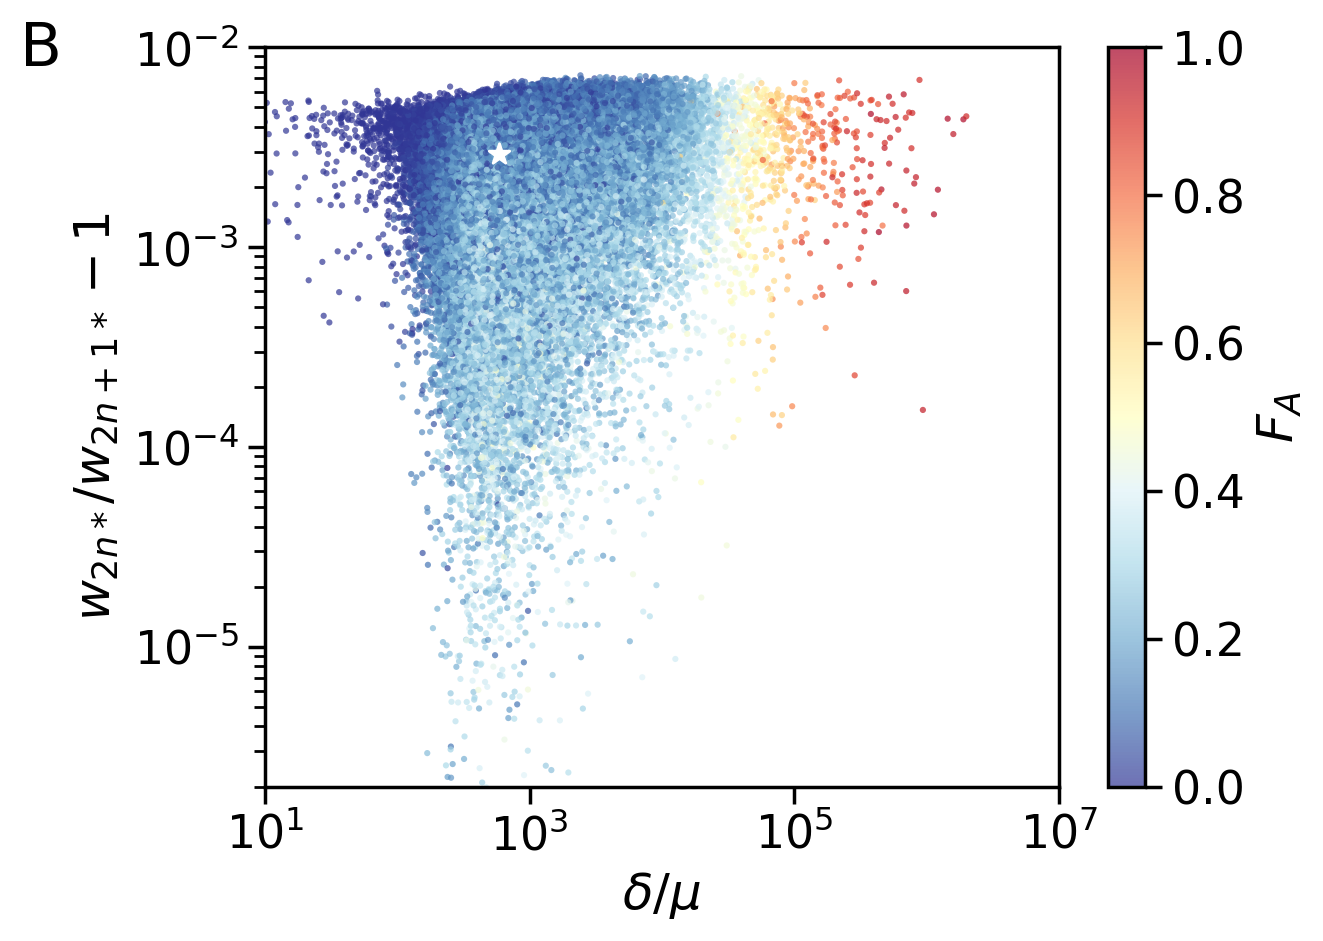

In [22]:
fig, ax = plt.subplots()

im = ax.scatter(post_sam[:,2]/post_sam[:,1],post_sam[:,5]/post_sam[:,4]-1, c=F_A, 
                cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.7, s=5, rasterized=True)
plt.colorbar(im, ax=ax, label='$F_A$')
ax.scatter(1.7e-3/2.9e-6,1.028/1.025-1, **star_kw)
ax.set_xscale('log')
ax.set_yscale('log')
xlabel = ax.set_xlabel('$\delta/\mu$')
ax.set_ylabel('$w_{2n*}/w_{2n+1*}-1$')
ax.set_xlim([10,1e7])
ax.set_ylim([2e-6,1e-2])
panel_label = panel_label = ax.text(0.14, 0.0081, 'B', **panel_label_kw)

bbox = dict(bbox_inches='tight', bbox_extra_artists=[xlabel, panel_label])
fig.savefig('../../figures/F_A_delta-mu-ratio_2.pdf', **bbox)

## MAP progress plot

In [44]:
# def simTP(μ, δ, w1, w2, w3, repetition=50, max_gen=5e6, seed=10, fixation=0.999):
#     return modelext.run_simulations(
#         6.425e6, μ, δ, δ,
#          w1, w2, w3, 
#         repetitions=repetition, max_gen=5e4 ,seed=seed, clonal_intf=True, fixation=fixation)

In [45]:
# simMAP = simTP(2.942e-6, 1.722e-3, 1.022, 1.025, 1.028) #simulate the MAP

In [37]:
# np.savez_compressed('../../results/posterior_predictions/simMAP', np.array(simMAP, dtype=object), allow_pickle=True)

In [23]:
simMAP = np.load('../../results/posterior_predictions/simMAP.npz', allow_pickle=True)['arr_0']
simMAP_totalfix = np.array(simMAP[1])
totalfix_MAP = simMAP_totalfix[:,-1,:]+simMAP_totalfix[:,-2,:]
simMAP_2nstar = np.array([np.vstack((simMAP_totalfix[x],totalfix_MAP[x]))for x in range(len(totalfix_MAP))])
np.shape(simMAP_2nstar),np.shape(simMAP_totalfix)

((2398, 6, 50), (2398, 5, 50))

In [24]:
simMAP_totalfix[:,1,:].max(axis=0).min(), simMAP_totalfix[:,2,:].max(axis=0).max() #highest frequency of 2n+1, highest frequency of 2n+1*

(0.980132607003891, 0.004782256809338521)

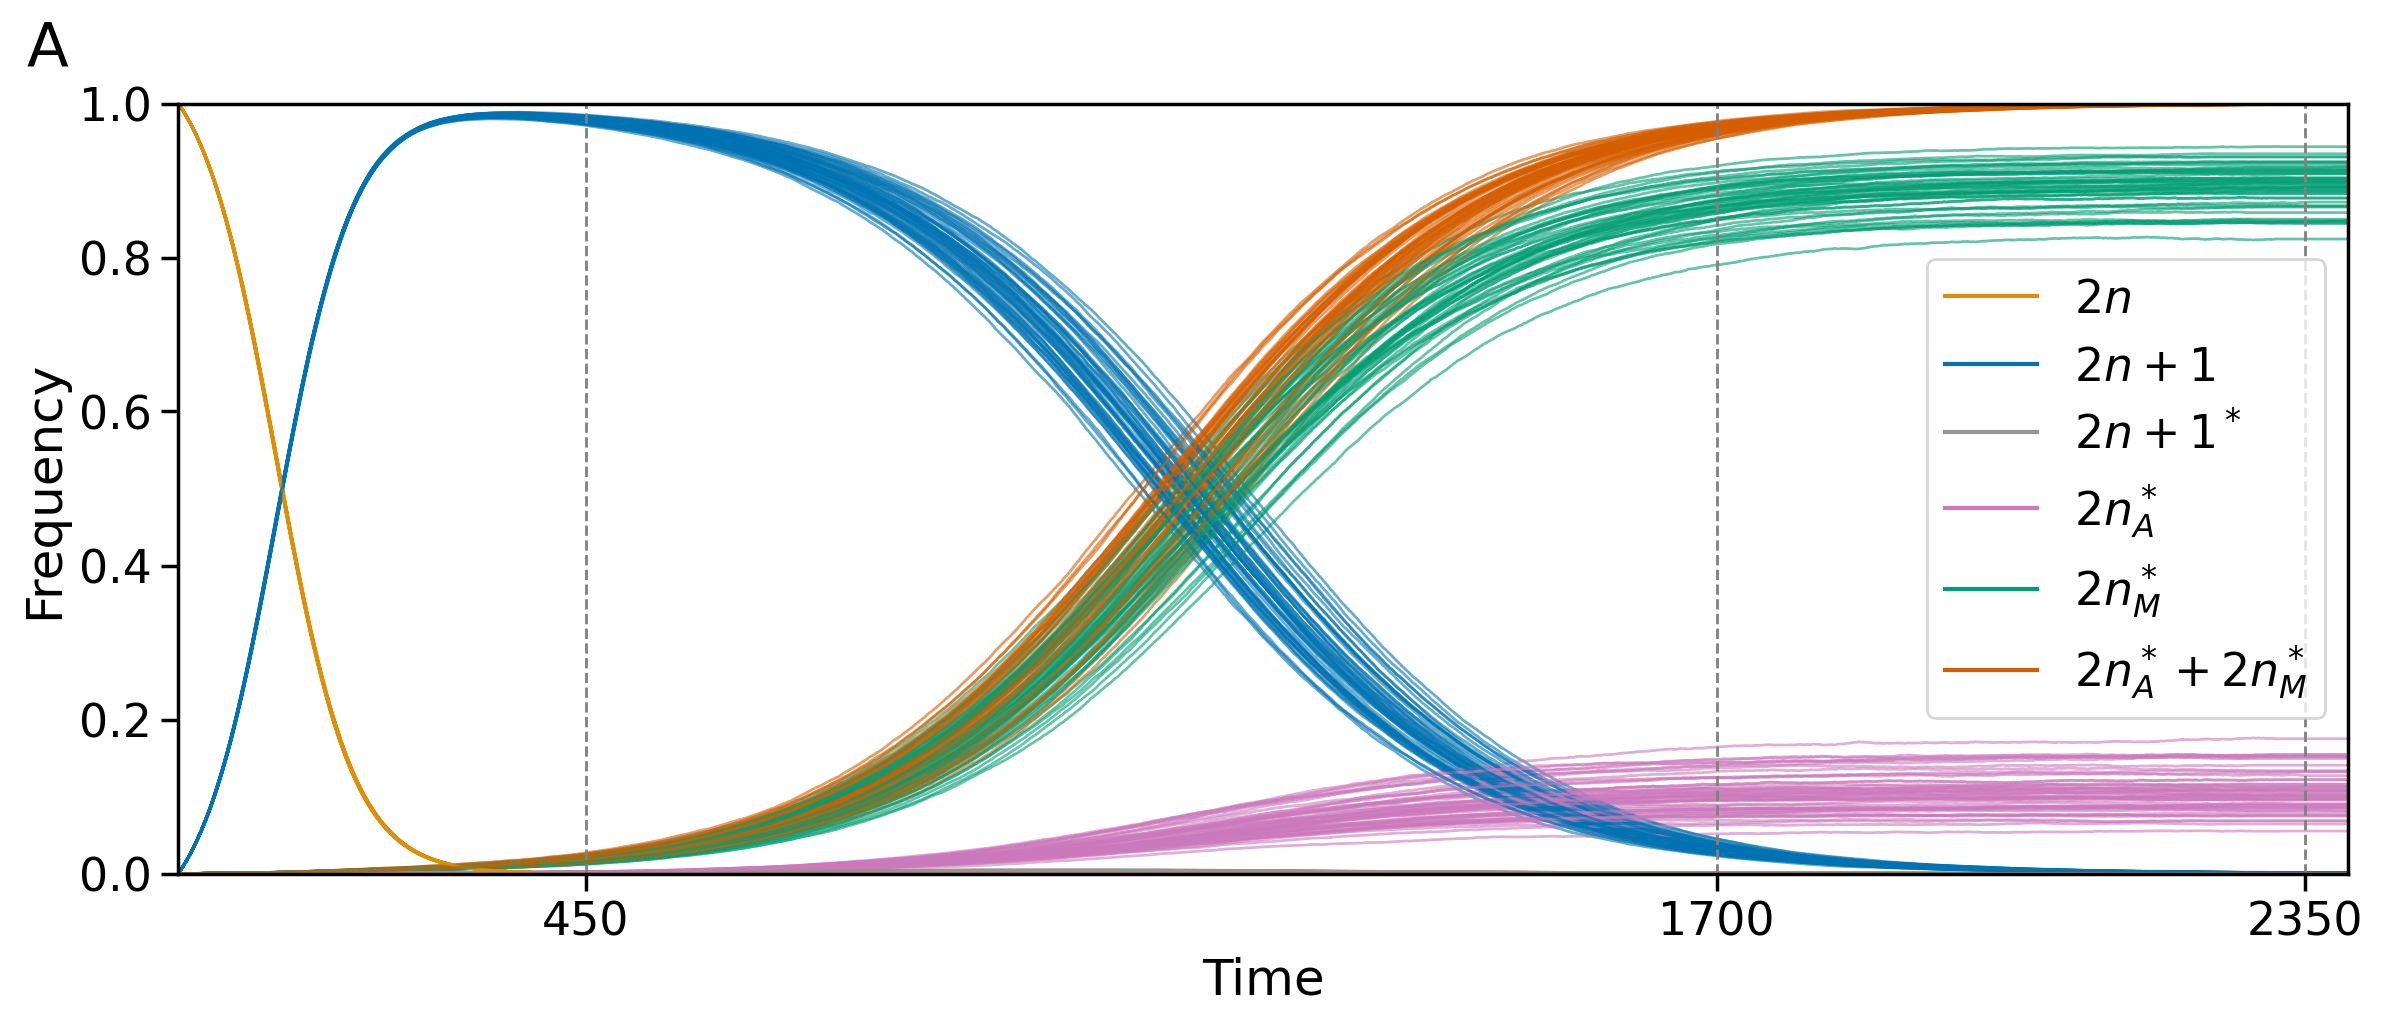

In [29]:
ax = modelext.plot_progress(
    np.array(simMAP_2nstar), 0, 
    ['$2n$','$2n+1$','$2n+1^*$',r'$2n^*_A$',r'$2n^*_M$',r'$2n^*_A+2n^*_M$'], 
    [yellow,blue,grey,pink,green,red],
    fixation=0.9999, alpha=.6, legend=True, xlim=(0,len(totalfix_MAP)), lw=1)
[modelext.plot_progress(np.array(simMAP_2nstar), x, ['2n','2n+1','$2n+1^*$',r'$2n^*_A$',r'$2n^*_M$','$2n^*$(total)'], [yellow,blue,grey,pink,green,red],fixation=0.9999, ax=ax, alpha=.6, legend=False, lw=1) for x in range(50)]
xlabel = ax.set_xlabel("Time")
ax.axvline(450, linestyle='--', linewidth=1, color='grey')
ax.axvline(1700, linestyle='--', linewidth=1, color='grey')
ax.axvline(2350, linestyle='--', linewidth=1, color='grey')
ax.set_xticks([450, 1700, 2350])
panel_label = ax.text(-.07, 1.05, 'A', transform=ax.transAxes, **panel_label_kw)

bbox = dict(bbox_inches='tight', bbox_extra_artists=[xlabel, panel_label])
ax.figure.savefig('../../figures/MAP_freq_dynamics.pdf', **bbox);

In [11]:
Nv = np.logspace(4, 8, 75, dtype=int)

In [15]:
MAPsim_N=np.array([modelext.run_simulations_time(N, 2.942e-6, 1.722e-3, 1.722e-3, 1.022, 1.025, 1.028, repetitions=250, 
                   max_gen=5e6, seed=10, fixation=0.999, clonal_intf=True,  fix_frequ=True) for N in Nv], dtype=object)

In [114]:
MAPsim_N2=np.array([modelext.run_simulations_time(N, 2.942e-6, 1.722e-3, 1.722e-3, 1.022, 1.025, 1.028, repetitions=500, 
                   max_gen=5e6, seed=10, fixation=0.999, clonal_intf=True,  fix_frequ=True) for N in Nv], dtype=object)

In [17]:
np.save('../../results/posterior_predictions/MAPsim_N',  MAPsim_N,  allow_pickle=True)

In [ ]:
MAPsim_N=np.load('../../results/posterior_predictions/MAPsim_N.npy', allow_pickle=True)

In [33]:
def bin_prop_bs_interval(x, n, α=0.05, resamples=10000):
    """Binomial proportions confidence interval with bootstrap.
    Parameters
    ----------
    x : np.ndarray
        array of proportions
    n : int
        number of observations made when calculating proportions in `x`
    resamples : int
        number of bootstrap resamples
    α : float, 0<α<1
        width of confidence interval
    Returns
    -------
    low, high : tuple of floats
        The lower and upper bounds of the proportions confidence interval
    """
    samples = np.random.binomial(n, x, resamples)
    low = np.percentile(samples, 100*α/2)
    high = np.percentile(samples, 100*(1-α/2))
    return x-low/n, high/n-x

In [103]:
aneu10=np.array([sum(MAPsim_N[x,2][0][0]>.1)/250 for x in range(len(MAPsim_N))])
aneu15=np.array([sum(MAPsim_N[x,2][0][0]>.15)/250 for x in range(len(MAPsim_N))])
aneu50=np.array([sum(MAPsim_N[x,2][0][0]>.5)/250 for x in range(len(MAPsim_N))])
aneu90=np.array([sum(MAPsim_N[x,2][0][0]>.9)/250 for x in range(len(MAPsim_N))])

In [18]:
mean_MAP_N=np.array([np.mean(MAPsim_N[x,2][0][0]) for x in range(len(MAPsim_N))])
perc_MAP_N=np.array([np.percentile(MAPsim_N[x,2][0][0],(2.5,97.5)) for x in range(len(MAPsim_N))])

In [45]:
CI=np.array([bin_prop_bs_interval(mean_MAP_N[x], 250, α=0.05, resamples=10000) for x in range(len(mean_MAP_N))])

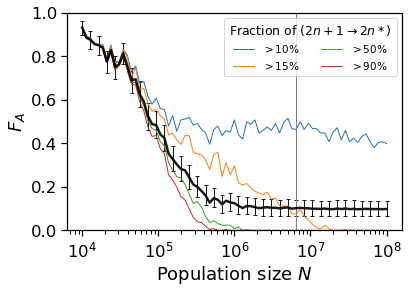

In [113]:
fig, ax = plt.subplots()

ax.errorbar(Nv, mean_MAP_N, CI.T, fmt='k', capsize=2, elinewidth=1, errorevery=2, alpha=.9)

ax.plot(Nv, aneu10, linewidth=1, label=r'$>10\% $ ')
ax.plot(Nv, aneu25, linewidth=1, label=r'$>15\% $ ')
ax.plot(Nv, aneu50, linewidth=1, label=r'$>50\% $ ')
ax.plot(Nv, aneu90, linewidth=1, label=r'$>90\% $ ')

ax.axvline(6.425e6, color='grey', linewidth=1)
ax.set_xscale('log')
ax.set_ylim([0,1])
ax.set_xlabel('Population size $N$')
ax.set_ylabel('$F_A$')

bbox = dict(bbox_inches='tight', bbox_extra_artists=[xlabel, panel_label])
ax.legend(#bbox_to_anchor=(1.05, 1), 
     ncol=2, title=r'Fraction of $(2n+1 \rightarrow 2n*)$ ', fontsize='xx-small', title_fontsize='x-small',
)
plt.savefig('../../figures/F_A_for_MAP_N.pdf', **bbox);